# $ {유임승차 \over 무임승차} $

In [6]:
import csv

f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)
print(header)
i=0
for row in data:
    print(row)
    if i>5:
       break
    i+=1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['Jun-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['Jun-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['Jun-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['Jun-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['Jun-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['Jun-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


In [10]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4, 8):
        row[i]=int(row[i])
    rate=row[4]/row[6]
    if rate>max_rate:
        max_rate=rate
        
print(max_rate)


# 오류가 날 수밖에 없음. 왜냐면 무임승차 인원이 0인 역이 있기 때문에

ZeroDivisionError: division by zero

## 무임승차 인원이 0인 역 찾기

In [13]:
f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)
max_rate=0
rate=0
i=0

for row in data:
    for i in range(4, 8):
        row[i]=int(row[i])
    rate=row[4]/(row[4]+row[6])
    
    if row[6]==0:
        print('무임승차 없는 역 : ', row)
        
f.close()

무임승차 없는 역 :  ['Jun-22', '일산선', '1949', '지축', 10, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '경의선', '1296', '계양', 10, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '경의선', '1297', '검암', 2, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '6호선', '2615', '연신내', 31, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '6호선', '2649', '신내', 4, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '7호선', '2753', '까치울', 1, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '7호선', '2758', '상동', 1, 0, 0, 0]
무임승차 없는 역 :  ['Jun-22', '7호선', '2761', '부평구청', 1, 0, 0, 0]


## 최대 무임승차 비율 확인

In [14]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4, 8):
        row[i]=int(row[i])
        
    if row[6]!=0:
        rate=(row[6]*100) / (row[4]+row[6])
        if rate>max_rate:
            max_rate=rate
            print(row, round(rate, 2), '%')

['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


## 최대 유임승차 인원이 있는 역

In [21]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)
max_rate=0
rate=0
max_row=[]
total_count=0
max_total_num=0

for row in data:
    for i in range(4, 8):
        row[i]=int(row[i])
    total_count=row[4]+row[6]
    if (row[6]!=0) and (total_count>100000):
        rate=row[4]/total_count
        if rate>max_rate:
            max_rate=rate
            max_row=row
            max_total_num=total_count
            
print(max_row)
print('역이름 : {0}, 전체 인원 : {1}, 유임승차인원:{2}, 유임승차 비율: {3:,}'.
     format(max_row[3],max_total_num, max_row[4], round(max_rate, 2)))

f.close()

['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
역이름 : 한양대, 전체 인원 : 281721, 유임승차인원:269240, 유임승차 비율: 0.96


## 유임승차 비율이 50% 이하인 역

In [23]:
f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)
print(header)
min_rate=100
rate=0
min_row=[]
total_count=0
min_total_count=0

for row in data:
    for i in [4, 6]:
        row[i]=int(row[i])
    total_count=row[4]+row[6]
    if (row[6]!=0) and (total_count>=10000):
        rate=row[4]/total_count
        if rate<=0.5:
            print(row, round(rate, 2))
            if rate<min_rate:
                min_rate=rate
                min_row=row
                min_total_count=total_count
                
print('유임승차 비율이 가장 낮은 역 : {}, 전체인원 : {}, 유임승차인원 : {}, 유임승차비율 : {}'
     .format(min_row[3], min_total_count, min_row[4], round(min_rate, 2)))

f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '157', '제기동', 218782, '209109', 263173, '281985'] 0.45
['Jun-22', '1호선', '159', '동묘앞', 122460, '131299', 146455, '147539'] 0.46
['Jun-22', '경원선', '1916', '소요산', 32659, '25998', 62990, '56806'] 0.34
['Jun-22', '중앙선', '1218', '원덕', 5854, '5749', 6959, '6739'] 0.46
['Jun-22', '중앙선', '1219', '용문', 34168, '34477', 38467, '38202'] 0.47
유임승차 비율이 가장 낮은 역 : 소요산, 전체인원 : 95649, 유임승차인원 : 32659, 유임승차비율 : 0.34


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current

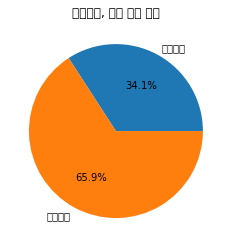

In [30]:
import platform
import matplotlib.pyplot as plt
if platform.system()=='Windosw':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.title(min_row[3]+'유, 무임 승차 비율')
label=['유임승차', '무임승차']
values=[min_row[4], min_row[6]]

plt.pie(values, labels=label, autopct='%.1f%%')
plt.show()

In [32]:
import csv
max=[0]*4
max_station=['']*4
label=['유임승차', '유임하차', '무임승차', '무임하차']

with open('subwayfee.csv') as f:
    data=csv.reader(f)
    next(data)
    
    for row in data:
        for i in range(4, 8):
            row[i]=int(row[i])
            if row[i]>max[i-4]:
                max[i-4]=row[i]
                max_station[i-4]=row[3]+' '+row[1]
                
for i in range(4):
    print('{} : {} {}'.format(label[i], max_station[i], max[i]))

유임승차 : 강남 2호선 2055521
유임하차 : 강남 2호선 2039847
무임승차 : 종로3가 1호선 299617
무임하차 : 제기동 1호선 281985


## 전체 지하철 역 파이차트 분석

In [35]:
label=['유임승차', '유임하차', '무임승차', '무임하차']
c=['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
pic_count=0

with open('subwayfee.csv') as f:
    data=csv.reader(f)
    next(data)
    if platform.system()=='Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppelGothic')
        
    for row in data:
        for i in range(4, 8):
            row[i]=int(row[i])
            
        plt.figure(dpi=200)
        plt.title(row[3]+' '+row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct='%.1f%%')
        plt.savefig(row[3]+' '+row[1]+'.png')
        plt.close()==
        
        pic_count+=1
        if pic_count>=10:
            break